## Contents

- KNN algorithm
    - K nearest neighbours
    - Recommended systems
    - tries to classify based on the similarity of the data points

## Steps


- Calculate the distance(Euclidean Distance)
- FInd closest neidhbours(choose the value of k
- vote for labels

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")
df.shape
df["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [29]:
M = df[df["Size"]=="M"]
print(M)

   Height  Weight Size
0     158      58    M
1     158      59    M
2     158      63    M
3     160      59    M
4     160      60    M
5     163      60    M
6     163      61    M


In [30]:
L = df[df["Size"]=="L"]
print(L)

    Height  Weight Size
7      160      64    L
8      163      64    L
9      165      61    L
10     165      61    L
11     165      62    L
12     168      62    L
13     168      63    L
14     168      66    L
15     170      63    L
16     170      64    L
17     170      68    L


In [31]:
g = df.groupby("Size")
g.get_group("M")

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [32]:
g.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


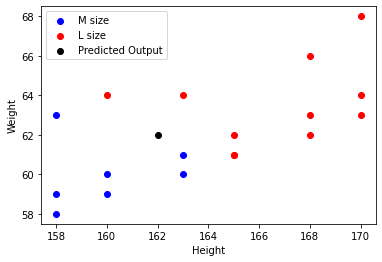

In [33]:
plt.scatter(M["Height"],M["Weight"], c = "b", label = "M size")
plt.scatter(L["Height"],L["Weight"], c = "r", label = "L size")
plt.scatter(162,62, c ="k",label="Predicted Output")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()

In [34]:
x = df.iloc[:,:2]#normal indexing to know data 
x

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [35]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
df["target"] = model.fit_transform(df["Size"])

In [36]:
y = df["target"]
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: target, dtype: int32

In [37]:
df["target"]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: target, dtype: int32

In [38]:
df

,Height,Weight,Size,target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [39]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier(n_neighbors = 3)# n_neighbors is a inbuilt variable for setting the k value i.e the k value in knn
nb.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [40]:
nb.predict([[162,62]])

array([1])

In [41]:
y_pred = nb.predict(x)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score
accuracy_score(y,y_pred)

1.0

In [45]:
confusion_matrix(y,y_pred)

array([[11,  0],
       [ 0,  7]], dtype=int64)

$$ precision = correct values/total predicted values$$
$$recall = correct values/ total actual values$$

In [46]:
precision_score(y,y_pred)

1.0

In [47]:
recall_score(y,y_pred)

1.0

In [52]:
## Heart Disease UCI dataset from kaggle

In [66]:
df1 = pd.read_csv("heart.csv")
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
x = df1.drop("target",axis = 1)

In [70]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [71]:
y = df1["target"]

In [72]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state = 25)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
nb = KNeighborsClassifier(n_neighbors = 3)
nb.fit(x,y)

KNeighborsClassifier(n_neighbors=3)

In [78]:
l = []
for i in range(1,20):
    nb = KNeighborsClassifier(n_neighbors = 4)
    nb.fit(x_train,y_train)
    y_pred = nb.predict(x_test)
    l.append(accuracy_score(y_test,y_pred)*100)

In [79]:
l

[70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034,
 70.32967032967034]

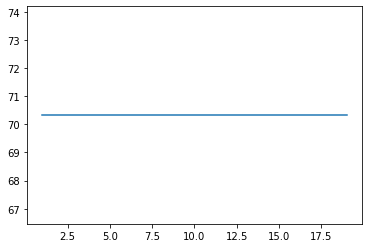

In [81]:
x1 = np.arange(1,20)
plt.plot(x,l)

In [84]:
y_pred = nb.predict(x_test)
accuracy_score(y_test,y_pred)*100

70.32967032967034

In [85]:
confusion_matrix(y_test,y_pred)

array([[31,  9],
       [18, 33]], dtype=int64)

In [86]:
precision_score(y_test,y_pred)

0.7857142857142857

In [87]:
recall_score(y_test,y_pred)

0.6470588235294118

- Actual values(31+33)##all these values are from confusion matrix
    - sufffer from heart disease-> 31
    - don't have heart disease -> 33
- Predicted values
    - don't have disease but predicted as diseased -> 9- false positive
    - have heart disease but predicted as not diseased ->18-false negative